## Домашняя работа по теме "Keras"

In [1]:
# The full neural network code!
###############################
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import multilabel_confusion_matrix
# Function to create model, required for KerasClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [2]:
# Зафиксируем seed
tf.keras.utils.set_random_seed(
    27
)

In [3]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [4]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Посмотрим на все категории

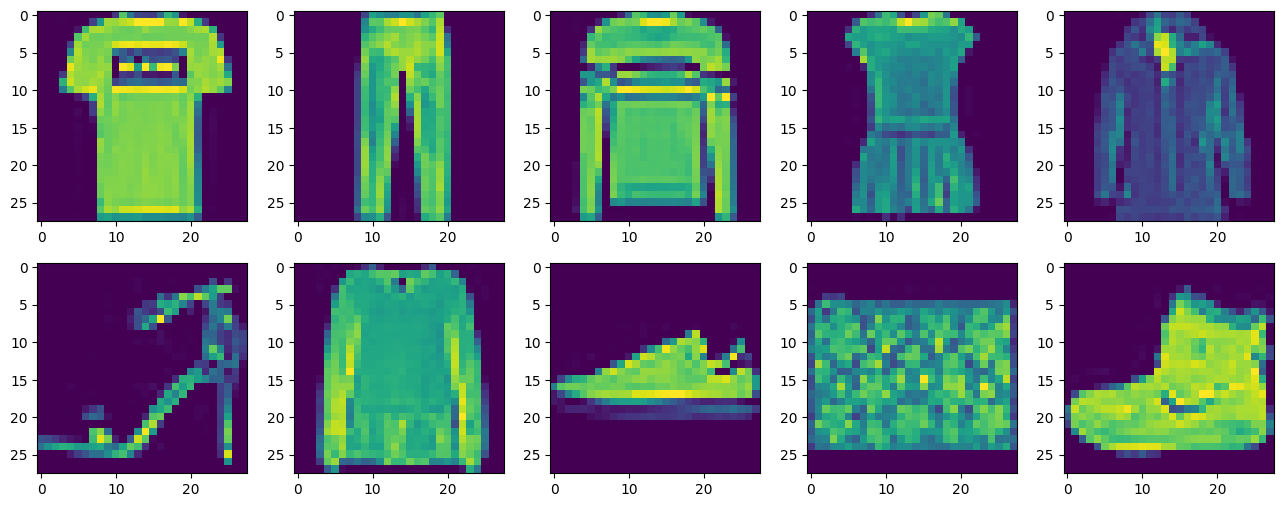

In [5]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = np.where(y_train_labels==i)[0][0]
    plt.imshow(X_train[index])

Классовые метки:<br>
   * 0 - футболка<br>
   * 1 - Брюки<br>
   * 2 - Пуловер<br>
   * 3 - Платье<br>
   * 4 - Пальто<br>
   * 5 - Сандалии<br>
   * 6 - Рубашка<br>
   * 7 - Кроссовок<br>
   * 8 - Сумка<br>
   * 9 - Ботинок

In [6]:
X_train.min(), X_train.max()

(0, 255)

In [7]:
# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

In [8]:
# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
# Build the model.
def create_model(optimizer='adam', n=2, k=90):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(784,)))
    for i in range(n - 1):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    # Compile the model.
    model.compile(
      optimizer='SGD',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [11]:
model = create_model()

In [12]:
# Train the model.
model.fit(
  X_train,
  to_categorical(y_train_labels),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  X_test,
  to_categorical(y_test_labels)
)

# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7 2 1 1 6]

# Check our predictions against the ground truths.
print(y_test_labels[:5]) # [9 2 1 1 6]

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7263 - accuracy: 0.7531
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4832 - accuracy: 0.8274
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4399 - accuracy: 0.8431
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4124 - accuracy: 0.8530
Epoch 5/5
1/1 [==============================] - 0s 79ms/step
[7 2 1 1 6]
[9 2 1 1 6]


Попробуем улучшить модель

In [13]:
n_layers = [2, 3, 5, 10]
k_output = {2:90, 3:70, 5:50, 10:30}
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []

for n in n_layers:
    k = k_output[n]
    model = create_model(optimizer='adam', n=n, k=k)
    model.fit(X_train,
                to_categorical(y_train_labels),
                epochs=5,
                batch_size=32,)
    
    train_loss, train_metric = model.evaluate(X_train, to_categorical(y_train_labels))
    test_loss, test_metric = model.evaluate(X_test, to_categorical(y_test_labels))
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)


result = pd.DataFrame()
result['n_layer'] = n_layers
result['n_num'] = k_output.values()
result['train_loss'] = train_losses
result['test_loss'] = test_losses
result['train_metric'] = train_metrics
result['test_metric'] = test_metrics
result.sort_values(by='test_metric', ascending=False)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7381 - accuracy: 0.7495
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4773 - accuracy: 0.8296
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4348 - accuracy: 0.8458
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4088 - accuracy: 0.8547
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8494
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7739 - accuracy: 0.7280
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.8253
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4329 - accuracy: 0.8442
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4033 - accuracy: 0.8560
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0

,n_layer,n_num,train_loss,test_loss,train_metric,test_metric
1,3,70,0.366860,0.411064,0.869467,0.8517
2,5,50,0.364179,0.415162,0.869650,0.8501
0,2,90,0.375878,0.419232,0.867633,0.8494
3,10,30,0.389827,0.443154,0.857867,0.8406


Лучшее качество получилось на 3 внутренних слоях с 70 нейронами.

Построим матрицу ошибок на результирующей модели

In [14]:
model = create_model(optimizer='adam', n=3, k=70)

In [16]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step


In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
#Create confusion matrix and normalizes it over predicted (columns)
result = multilabel_confusion_matrix(y_test_labels, y_pred_class, labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [20]:
def print_confusion_matrix(confusion_matrix, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, cmap="crest")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix for the class - " + class_label)

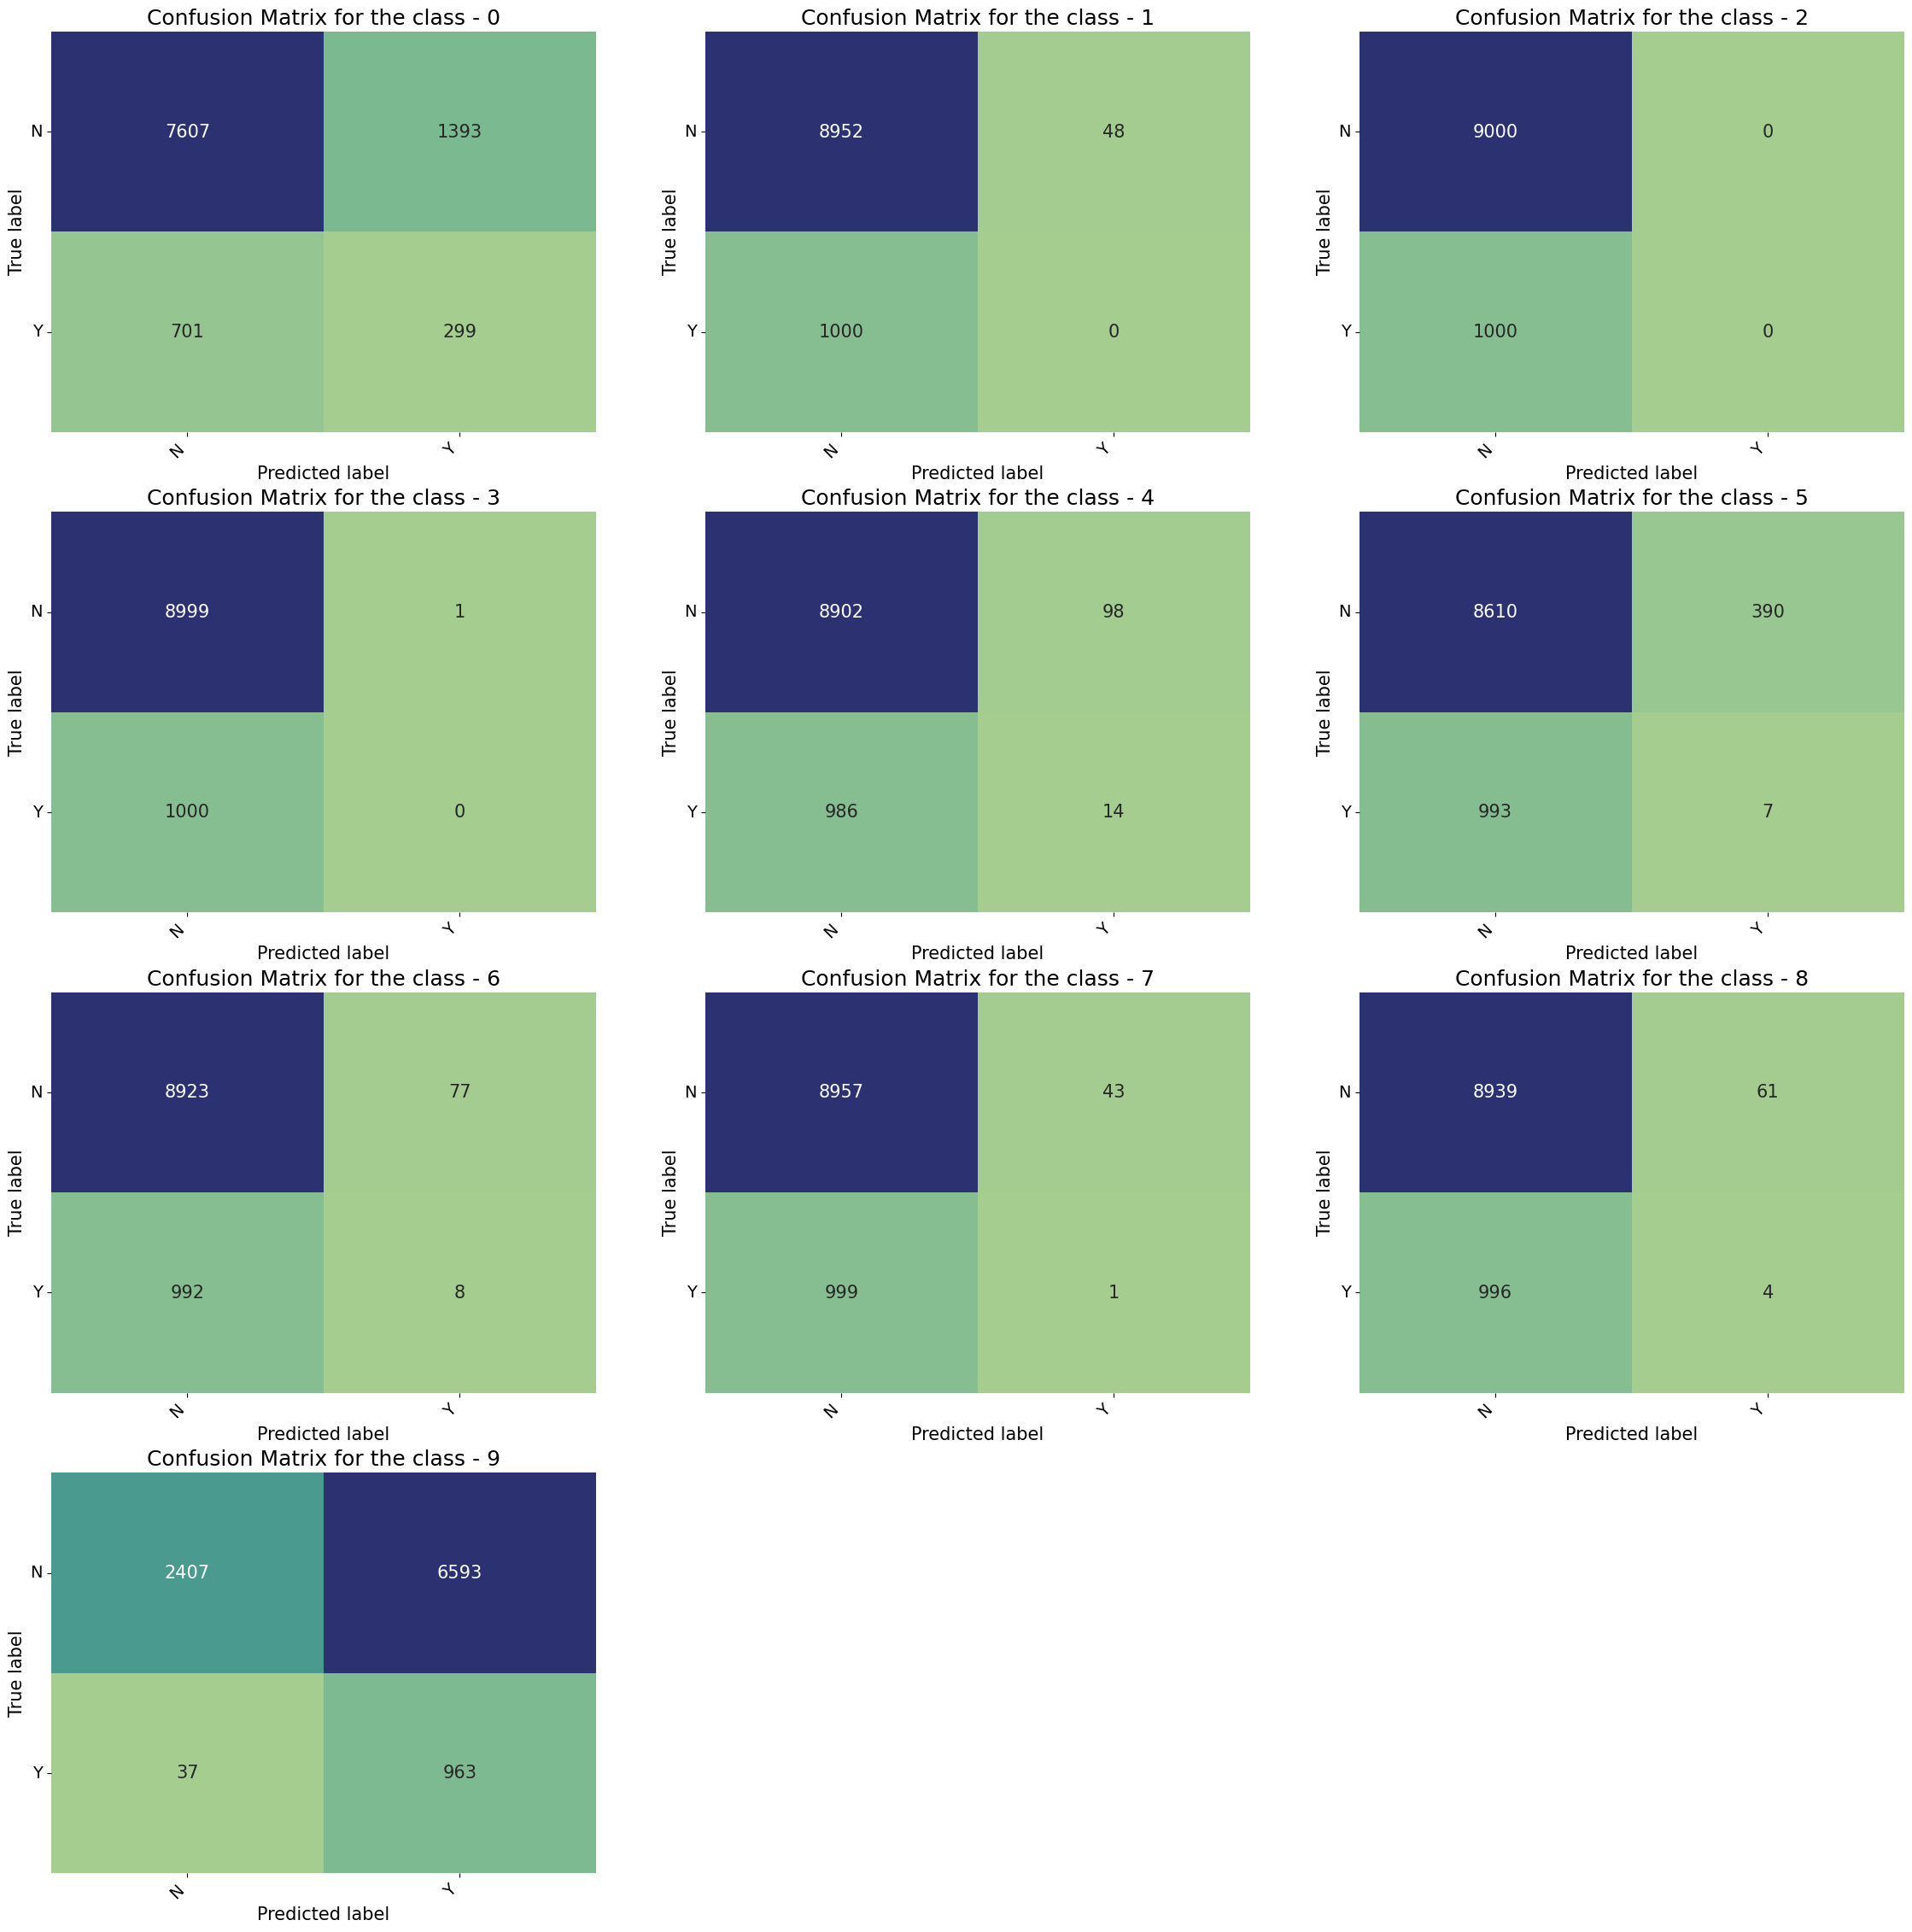

In [22]:
labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
count = 0
plt.figure(figsize = (28, 28))

for num, label in enumerate(labels):
    count += 1
    plt.subplot(4, 3, count)
    print_confusion_matrix(result[num], label, ["N", "Y"])

plt.show()

Чаще всего модель ошибается при определении классов: 0, 5 и 9 (футболки, сандалии, ботинки)